### Importing useful Libraries

In [1]:
import pandas as pd
from textblob import TextBlob
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem import PorterStemmer
import seaborn as sns
import matplotlib.pylab as plt


### Downloading NLTK data files

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Loading data

In [3]:
df_news = pd.read_csv('../Data/raw_analyst_ratings.csv')
headlines = df_news['headline']

### Stemming and Stop word Removing

In [5]:
# Initialize the PorterStemmer
ps = PorterStemmer()

# Define a function to clean and process the text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    
    # Perform stemming
    words = [ps.stem(word) for word in words]
    
    # Rejoin the words into a single string
    processed_text = ' '.join(words)
    return processed_text

# Sentiment Analysis with TextBlob

In [6]:
# Define a function to calculate sentiment
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

### Applying the Functions to the DataFrame

In [7]:
# List of stock symbols for filtering
stock_symbols = ['AAPL', 'AMZN', 'GOOGL', 'MSFT', 'META', 'NVDA', 'TSLA']

# Filter rows where the stock symbol is in the specified list
df_news_filtered = df_news[df_news['stock'].isin(stock_symbols)]

# Apply text preprocessing and sentiment analysis to the filtered DataFrame
df_news_filtered['cleaned_headline'] = df_news_filtered['headline'].apply(preprocess_text)
df_news_filtered['sentiment'] = df_news_filtered['cleaned_headline'].apply(calculate_sentiment)

# Update the original DataFrame with the processed data
df_news.update(df_news_filtered)


C:\Users\Admin\AppData\Local\Temp\ipykernel_9568\2764048879.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_filtered['cleaned_headline'] = df_news_filtered['headline'].apply(preprocess_text)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9568\2764048879.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_filtered['sentiment'] = df_news_filtered['cleaned_headline'].apply(calculate_sentiment)


### Separate Date and Time

In [8]:
# Convert the 'date' column to datetime format with ISO8601 and set timezone to UTC
df_news_filtered['date'] = pd.to_datetime(df_news_filtered['date'], format='%Y-%m-%d %H:%M:%S', utc=True, errors='coerce')

# Extract the date and time into separate columns
df_news_filtered['date_only'] = df_news_filtered['date'].dt.date
df_news_filtered['time_only'] = df_news_filtered['date'].dt.time

# Drop rows with invalid datetime entries if necessary
df_news_filtered = df_news_filtered.dropna(subset=['date'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_9568\1176123012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_filtered['date'] = pd.to_datetime(df_news_filtered['date'], format='%Y-%m-%d %H:%M:%S', utc=True, errors='coerce')
C:\Users\Admin\AppData\Local\Temp\ipykernel_9568\1176123012.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_news_filtered['date_only'] = df_news_filtered['date'].dt.date
C:\Users\Admin\AppData\Local\Temp\ipykernel_9568\1176123012.py:6: SettingWithCopyWarning: 
A value i

In [9]:
df_news_filtered.head()

,Unnamed: 0,headline,url,publisher,date,stock,cleaned_headline,sentiment,date_only,time_only
6690,7159,'Apple is tracking iPhones stolen by looters' ...,https://www.benzinga.com/news/20/06/16161103/a...,Benzinga Newsdesk,2020-06-02 00:00:00+00:00,AAPL,'appl track iphon stolen looters' -earlier ny ...,0.0,2020-06-02,00:00:00
6691,7160,MoneyGram Shares Jump 50% As Western Union Rep...,https://www.benzinga.com/m-a/20/06/16156730/mo...,Neer Varshney,2020-06-02 00:00:00+00:00,AAPL,moneygram share jump 50% western union reporte...,0.0,2020-06-02,00:00:00
6692,7161,Hearing Susquehanna Check Suggests Total iPhon...,https://www.benzinga.com/analyst-ratings/analy...,Benzinga Newsdesk,2020-06-02 00:00:00+00:00,AAPL,hear susquehanna check suggest total iphon 12 ...,-0.1,2020-06-02,00:00:00
6693,7162,Tesla CEO Musk Says Other Three Officers Shoul...,https://www.benzinga.com/news/20/06/16156648/t...,Neer Varshney,2020-06-02 00:00:00+00:00,AAPL,tesla ceo musk say three offic charg floyd' mu...,0.0,2020-06-02,00:00:00
6694,7163,A Peek Into The Markets: US Stock Futures Up; ...,https://www.benzinga.com/news/earnings/20/06/1...,Lisa Levin,2020-06-02 00:00:00+00:00,AAPL,peek markets: us stock futur up; crude oil ris...,-0.7,2020-06-02,00:00:00


In [10]:
df_news_filtered.tail()



,Unnamed: 0,headline,url,publisher,date,stock,cleaned_headline,sentiment,date_only,time_only
1257091,1263065,Electrek.Co Tweet: Tesla's head of Europe is out,https://www.benzinga.com/news/19/07/14015998/e...,Charles Gross,2019-07-02 00:00:00+00:00,TSLA,electrek.co tweet: tesla' head europ,0.000,2019-07-02,00:00:00
1257092,1263066,Tesla's Q2 Delivery Number Could Cause A Big Move,https://www.benzinga.com/analyst-ratings/analy...,Wayne Duggan,2019-07-01 00:00:00+00:00,TSLA,tesla' q2 deliveri number could caus big move,0.000,2019-07-01,00:00:00
1257093,1263067,'Tesla Electric Airplane? Elon Musk sees elect...,https://www.benzinga.com/news/19/07/14011389/t...,Benzinga Newsdesk,2019-07-01 00:00:00+00:00,TSLA,'tesla electr airplane? elon musk see electr a...,0.000,2019-07-01,00:00:00
1257094,1263068,"UPDATE: JMP Reiterates Outperform, $347 Target...",https://www.benzinga.com/analyst-ratings/analy...,Benzinga_Newsdesk,2019-07-01 00:00:00+00:00,TSLA,"update: jmp reiter outperform, $347 target tes...",0.075,2019-07-01,00:00:00
1257095,1263069,Tesla shares are trading higher after JMP Secu...,https://www.benzinga.com/markets/wiim/19/07/14...,Hal Lindon,2019-07-01 00:00:00+00:00,TSLA,tesla share trade higher jmp secur reiter mark...,0.250,2019-07-01,00:00:00


## Visualization

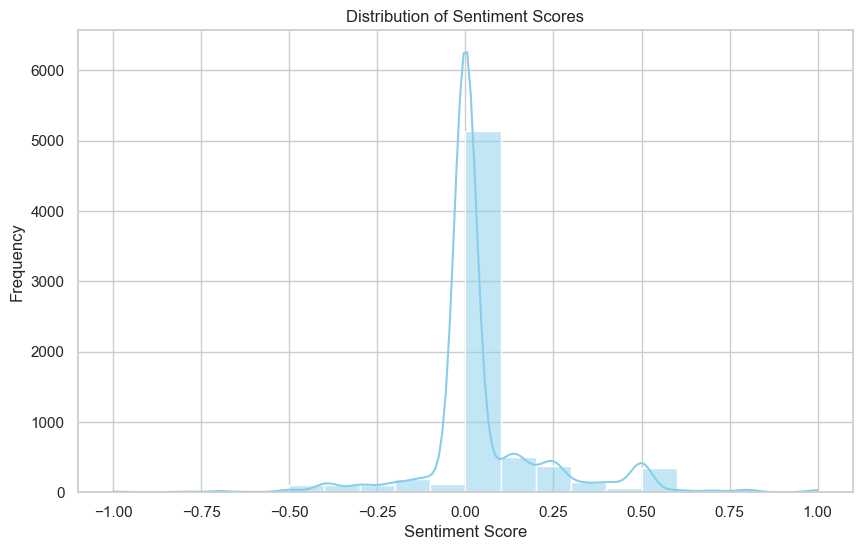

In [11]:

sns.set(style="whitegrid")

# Histogram of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df_news_filtered['sentiment'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

### Sentiment Scores by Category

C:\Users\Admin\AppData\Local\Temp\ipykernel_9568\2357371551.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=df_news_filtered, palette='viridis')


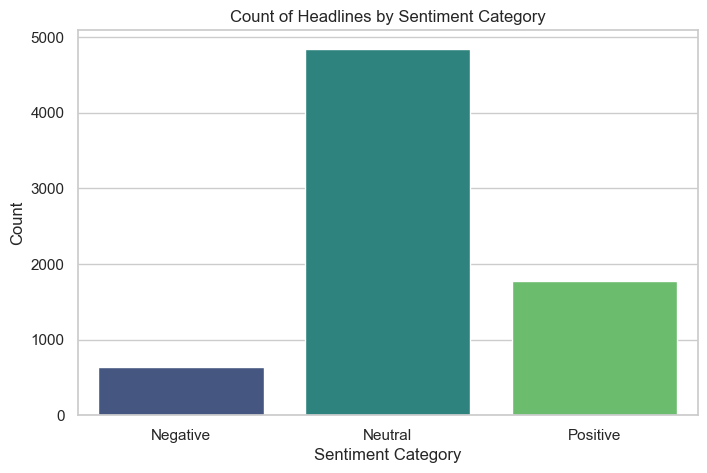

In [12]:
df_news_filtered['sentiment_category'] = pd.cut(df_news_filtered['sentiment'], bins=[-1, -0.01, 0.01, 1], labels=['Negative', 'Neutral', 'Positive'])

# Bar plot of sentiment categories
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment_category', data=df_news_filtered, palette='viridis')
plt.title('Count of Headlines by Sentiment Category')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

# Correlation

In [14]:
file_paths = {
    'Apple': '../data/yfinance_data/AAPL_historical_data.csv',
    'Amazon': '../data/yfinance_data/AMZN_historical_data.csv',
    'Google': '../data/yfinance_data/GOOG_historical_data.csv',
    'Meta': '../data/yfinance_data/META_historical_data.csv',
    'Microsoft': '../data/yfinance_data/MSFT_historical_data.csv',
    'Tesla': '../data/yfinance_data/TSLA_historical_data.csv',
    'Nvidia': '../data/yfinance_data/NVDA_historical_data.csv'
}

### Merging the files

In [15]:
data_frames = []
for company, file_path in file_paths.items():
    df = pd.read_csv(file_path)
    df['Company'] = company  # Add a column for the company name
    data_frames.append(df)

# Merge all DataFrames into a single DataFrame
merged_df = pd.concat(data_frames, ignore_index=True)
required_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Date', 'Company']

if not all(col in merged_df.columns for col in required_columns):
    raise ValueError('Data does not contain the required columns')

# Convert the 'Date' column to datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'], errors='coerce', utc=True)

# Create separate 'date_only' and 'time_only' columns
merged_df['date_only'] = merged_df['Date'].dt.date  # Extract the date
merged_df['time_only'] = merged_df['Date'].dt.time  # Extract the time
merged_df.drop(columns=['Date'], inplace=True)

# Optionally, drop rows with NaT values if there are any
merged_df.dropna(subset=['date_only', 'time_only'], inplace=True)

In [16]:
merged_df.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Company,date_only,time_only
0,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,Apple,1980-12-12,00:00:00
1,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,Apple,1980-12-15,00:00:00
2,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,Apple,1980-12-16,00:00:00
3,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,Apple,1980-12-17,00:00:00
4,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,Apple,1980-12-18,00:00:00


In [17]:
df_news_filtered['date_only'] = pd.to_datetime(df_news_filtered['date_only'])
merged_df['date_only'] = pd.to_datetime(merged_df['date_only'])

# Merge the DataFrames on the 'date_only' column
combined_df = pd.merge(df_news_filtered, merged_df, on='date_only', how='inner')

# Drop rows with missing values if necessary
combined_df.dropna(subset=['sentiment', 'Open', 'High', 'Low', 'Close', 'Volume'], inplace=True)

# Calculate correlation between sentiment and stock metrics
correlation_results = combined_df[['sentiment', 'Open', 'High', 'Low', 'Close', 'Volume']].corr()

print(correlation_results)

           sentiment      Open      High       Low     Close    Volume
sentiment   1.000000 -0.015082 -0.015328 -0.014673 -0.014748  0.000892
Open       -0.015082  1.000000  0.999800  0.999791  0.999646 -0.453020
High       -0.015328  0.999800  1.000000  0.999627  0.999780 -0.451096
Low        -0.014673  0.999791  0.999627  1.000000  0.999785 -0.454809
Close      -0.014748  0.999646  0.999780  0.999785  1.000000 -0.452988
Volume      0.000892 -0.453020 -0.451096 -0.454809 -0.452988  1.000000


Columns in DataFrame: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends',
       'Stock Splits', 'Company', 'date_only', 'time_only'],
      dtype='object')


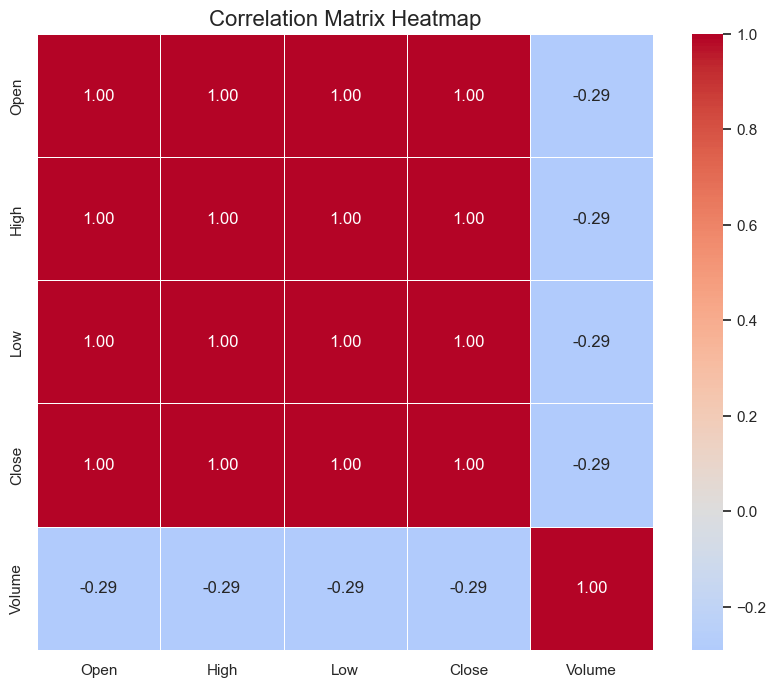

In [18]:


print("Columns in DataFrame:", merged_df.columns)
required_columns = ['sentiment', 'Open', 'High', 'Low', 'Close', 'Volume']
existing_columns = [col for col in required_columns if col in merged_df.columns]

# Calculate the correlation matrix only with existing columns
corr_matrix = merged_df[existing_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=0.5)

# Set titles and labels
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()


## daily stock return

In [20]:
# Calculate daily stock returns (percentage change in closing prices)
merged_df['daily_returns'] = merged_df.groupby('Company')['Close'].pct_change()

# Display the first few rows to verify
merged_df.head(30)


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Company,date_only,time_only,daily_returns
0,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,Apple,1980-12-12,00:00:00,NaN
1,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,Apple,1980-12-15,00:00:00,-0.052171
2,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,Apple,1980-12-16,00:00:00,-0.073398
3,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,Apple,1980-12-17,00:00:00,0.024751
4,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,Apple,1980-12-18,00:00:00,0.028992
5,0.126116,0.126674,0.126116,0.126116,0.097223,48630400,0.0,0.0,Apple,1980-12-19,00:00:00,0.061029
6,0.132254,0.132813,0.132254,0.132254,0.101954,37363200,0.0,0.0,Apple,1980-12-22,00:00:00,0.048670
7,0.137835,0.138393,0.137835,0.137835,0.106257,46950400,0.0,0.0,Apple,1980-12-23,00:00:00,0.042199
8,0.145089,0.145647,0.145089,0.145089,0.111849,48003200,0.0,0.0,Apple,1980-12-24,00:00:00,0.052628
9,0.158482,0.159040,0.158482,0.158482,0.122173,55574400,0.0,0.0,Apple,1980-12-26,00:00:00,0.092309


## Visualization 

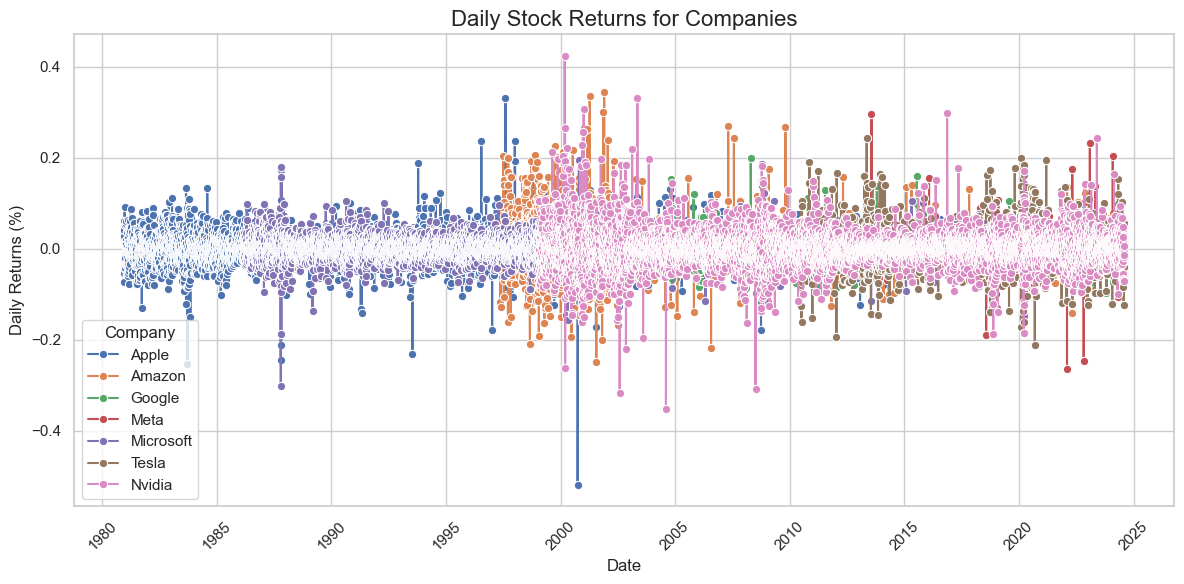

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_df, x='date_only', y='daily_returns', hue='Company', marker="o")
plt.title('Daily Stock Returns for Companies', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Returns (%)', fontsize=12)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()